In [1]:
import numpy as np
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW , ULDM, SunEarthDistance, ParseDate

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param = {'SinT12': 0.308, 'T13': 8.57, 'M12': 7.5e-5,
         'mdm' : 1e3, 'mu1': 0., 'mu2': 0., 'mu3': 0., 'alpha' : 0., 'epsx':1., 'epsy':0. }

Enu   = np.logspace(-1, np.log10(16), 300)

frame = FrameWork()

In [24]:
# peanuts_B8 = np.loadtxt('Data/peanuts_B8.txt')
# peanuts_B8M = np.loadtxt('Data/peanuts_B8M.txt')

# peanuts_msw_B8 = np.loadtxt('Data/peanuts_msw_B8.txt')
# peanuts_msw_B8M = np.loadtxt('Data/peanuts_msw_B8M.txt')


peanuts_msw_B8_epsx = np.loadtxt('Data/peanuts_msw_B8_epsx.txt')
peanuts_B8_epsx = np.loadtxt('Data/peanuts_B8_epsx.txt')
peanuts_B8_epsy = np.loadtxt('Data/peanuts_B8_epsy.txt')
peanuts_B8_epsz = np.loadtxt('Data/peanuts_B8_epsz.txt')

peanuts_B8_epsx_mu1 = np.loadtxt('Data/peanuts_B8_epsx_mu1.txt')
peanuts_B8_epsy_mu1 = np.loadtxt('Data/peanuts_B8_epsy_mu1.txt')
peanuts_B8_epsz_mu1 = np.loadtxt('Data/peanuts_B8_epsz_mu1.txt')

peanuts_B8_epsz_mu1_el = np.loadtxt('Data/peanuts_B8_epsz_mu1_el.txt')
peanuts_B8_epsx_mu1_el = np.loadtxt('Data/peanuts_B8_epsx_mu1_el.txt')
peanuts_B8_epsy_mu1_el = np.loadtxt('Data/peanuts_B8_epsy_mu1_el.txt')


peanuts_B8_epsz_mu2_el = np.loadtxt('Data/peanuts_B8_epsz_mu2_el.txt')
peanuts_B8_epsx_mu2_el = np.loadtxt('Data/peanuts_B8_epsx_mu2_el.txt')
peanuts_B8_epsy_mu2_el = np.loadtxt('Data/peanuts_B8_epsy_mu2_el.txt')


peanuts_B8_epsz_mu2_el_alpha45 = np.loadtxt('Data/peanuts_B8_epsz_mu2_el_alpha45.txt')
peanuts_B8_epsz_mu2_el_alpha90 = np.loadtxt('Data/peanuts_B8_epsz_mu2_el_alpha90.txt')
peanuts_B8_epsz_mu2_el_alpha120 = np.loadtxt('Data/peanuts_B8_epsz_mu2_el_alpha120.txt')
peanuts_B8_epsz_mu2_el_alpha180 = np.loadtxt('Data/peanuts_B8_epsz_mu2_el_alpha180.txt')



ECCENTRICITY = (1.521 - 1.471)/(1.521 + 1.471)
ASTRO_UNIT    =  1.496
RHO_DM2  = np.sqrt(2 * 0.4 * 7.65) #e-21 GeV^2
LIGHT_SPEED = 2.998 # 1e8 m/s

def SunEarthDistance(resolution=0.01):
    theta = np.arange(0,2*np.pi,resolution)
    cos   = np.cos(theta)
    l     = (1 - ECCENTRICITY**2) / (1 + ECCENTRICITY * cos)   
    return l,theta

_,th_radians = SunEarthDistance()

th_degrees = (180/np.pi) * th_radians

# Pee, _, ls, angle = ULDM(param, Enu)

# plt.plot(angle, ls[:,0],'.')

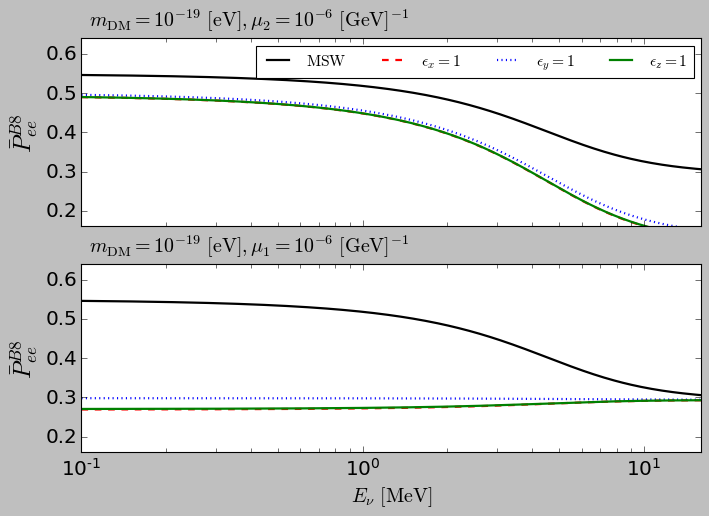

In [15]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.16,0.64)
ax1.set_xlim(0.1,16)
ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax1.plot(peanuts_msw_B8_epsx[:,0],peanuts_msw_B8_epsx[:,1],color='k',ls='-',lw=2, label= r'$\rm MSW$')
ax1.plot(peanuts_B8_epsx[:,0],peanuts_B8_epsx[:,1],color='r',ls='--',lw=2, label= r'$\epsilon_x = 1$')
ax1.plot(peanuts_B8_epsy[:,0],peanuts_B8_epsy[:,1],color='b',ls=':',lw=2, label= r'$\epsilon_y = 1$')
ax1.plot(peanuts_B8_epsz[:,0],peanuts_B8_epsz[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')
ax1.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)


plt.legend(ncol=4,fontsize=14)

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.16,0.64)
ax2.set_xlim(0.1,16)
ax2.set_xscale('log')

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)

ax2.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
#ax2.xaxis.set_major_formatter(plt.NullFormatter())


ax2.plot(peanuts_msw_B8_epsx[:,0],peanuts_msw_B8_epsx[:,1],color='k',ls='-',lw=2, label= r'$\rm MSW$')
ax2.plot(peanuts_B8_epsx_mu1[:,0],peanuts_B8_epsx_mu1[:,1],color='r',ls='--',lw=2, label= r'$\epsilon_x = 1$')
ax2.plot(peanuts_B8_epsy_mu1[:,0],peanuts_B8_epsy_mu1[:,1],color='b',ls=':',lw=2, label= r'$\epsilon_y = 1$')
ax2.plot(peanuts_B8_epsz_mu1[:,0],peanuts_B8_epsz_mu1[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')
ax2.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_1= 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)

plt.savefig('Pee_Bar_alpha0_epsxyz_mu1_mu2.pdf',bbox_inches='tight')

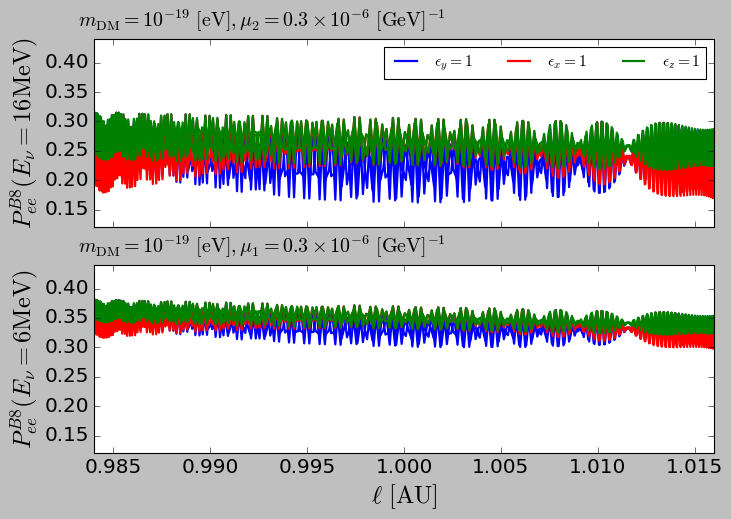

In [16]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.12,0.44)
ax1.set_xlim(0.984,1.016)
#ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax1.plot(peanuts_B8_epsy_mu2_el[:,0],peanuts_B8_epsy_mu2_el[:,1],color='b',ls='-',lw=2, label= r'$\epsilon_y = 1$')
ax1.plot(peanuts_B8_epsx_mu2_el[:,0],peanuts_B8_epsx_mu2_el[:,1],color='r',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax1.plot(peanuts_B8_epsz_mu2_el[:,0],peanuts_B8_epsz_mu2_el[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')
ax1.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 0.3 \times 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)
plt.legend(ncol=4,fontsize=14)

ax0 = fig.add_subplot(312)
ax0.set_ylim(0.12,0.44)
ax0.set_xlim(0.984,1.016)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$\ell \ \rm [AU]$',fontsize=22)
ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 6 \rm MeV)$',fontsize=22)
ax0.get_xaxis().get_major_formatter().set_useOffset(False)


ax0.plot(peanuts_B8_epsy_mu1_el[:,0],peanuts_B8_epsy_mu1_el[:,1],color='b',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax0.plot(peanuts_B8_epsx_mu1_el[:,0],peanuts_B8_epsx_mu1_el[:,1],color='r',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax0.plot(peanuts_B8_epsz_mu1_el[:,0],peanuts_B8_epsz_mu1_el[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_x = 1$')

ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_1=0.3 \times 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)

plt.savefig('Pee_E16(6)_alpha0_epsxyz_mu1_mu2.pdf',bbox_inches='tight')

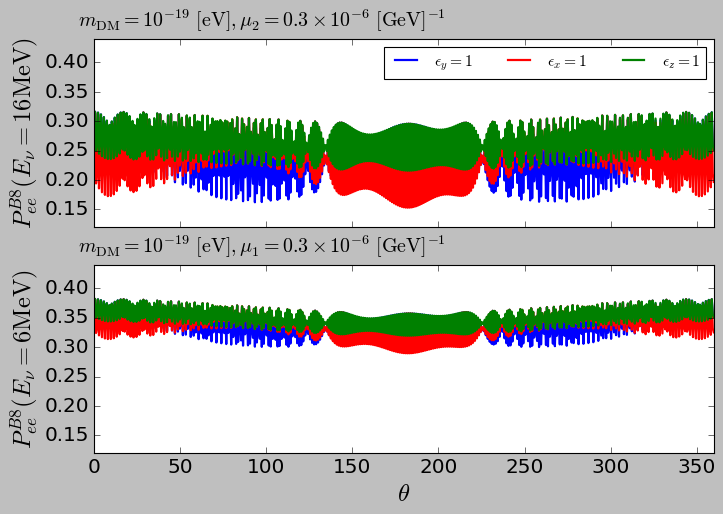

In [20]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.12,0.44)
ax1.set_xlim(0,360)
#ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax1.plot(th_degrees,peanuts_B8_epsy_mu2_el[:,1],color='b',ls='-',lw=2, label= r'$\epsilon_y = 1$')
ax1.plot(th_degrees,peanuts_B8_epsx_mu2_el[:,1],color='r',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax1.plot(th_degrees,peanuts_B8_epsz_mu2_el[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')
ax1.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 0.3 \times 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)

plt.legend(ncol=4,fontsize=14)

ax0 = fig.add_subplot(312)
ax0.set_ylim(0.12,0.44)
ax0.set_xlim(0,360)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$\theta $',fontsize=22)
ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 6 \rm MeV)$',fontsize=22)
ax0.get_xaxis().get_major_formatter().set_useOffset(False)


ax0.plot(th_degrees,peanuts_B8_epsy_mu1_el[:,1],color='b',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax0.plot(th_degrees,peanuts_B8_epsx_mu1_el[:,1],color='r',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax0.plot(th_degrees,peanuts_B8_epsz_mu1_el[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_x = 1$')

ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_1=0.3 \times 10^{-6} \ [\rm GeV]^{-1}$',y=1.05, pad=2, x=.27,fontsize=18)

plt.savefig('Pee_E16(6)_alpha0_epsxyz_mu1_mu2_angle.pdf',bbox_inches='tight')

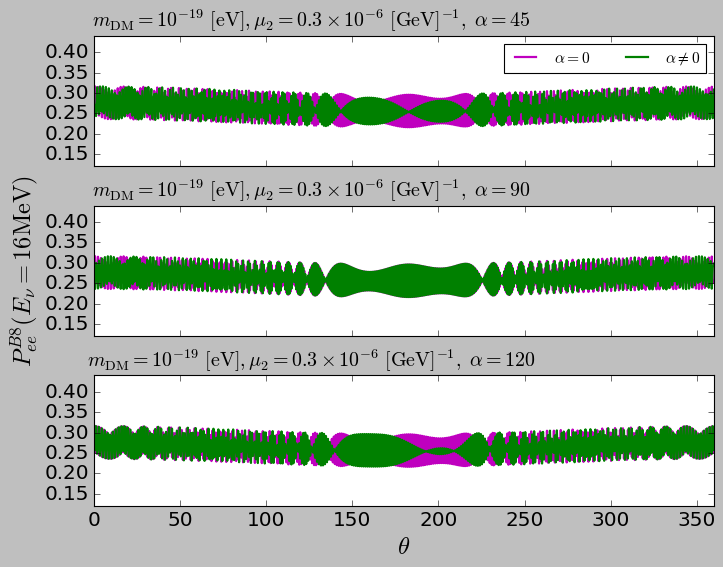

In [42]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(411)
ax1.set_ylim(0.12,0.44)
ax1.set_xlim(0,360)
#ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$\theta $',fontsize=22)
#ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

#ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)

ax1.plot(th_degrees,peanuts_B8_epsz_mu2_el[:,1],color='m',ls='-',lw=2, label= r'$\alpha = 0$')
ax1.plot(th_degrees,peanuts_B8_epsz_mu2_el_alpha45[:,1],color='g',ls='-',lw=2, label= r'$\alpha \neq 0$')
ax1.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 0.3 \times 10^{-6} \ [\rm GeV]^{-1}, \ \alpha=45$',
              y=1.05, pad=2, x=.35,fontsize=18)

plt.legend(ncol=2,fontsize=14)

ax0 = fig.add_subplot(412)
ax0.set_ylim(0.12,0.44)
ax0.set_xlim(0,360)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)


ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax0.xaxis.set_major_formatter(plt.NullFormatter())

ax0.plot(th_degrees,peanuts_B8_epsz_mu2_el[:,1],color='m',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax0.plot(th_degrees,peanuts_B8_epsz_mu2_el_alpha90[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 0.3 \times 10^{-6} \ [\rm GeV]^{-1}, \ \alpha=90$',
              y=1.05, pad=2, x=.35,fontsize=18)

ax2 = fig.add_subplot(413)
ax2.set_ylim(0.12,0.44)
ax2.set_xlim(0,360)

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)


ax2.set_xlabel(r'$\theta $',fontsize=22)
#ax2.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 6 \rm MeV)$',fontsize=22)
#ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax2.plot(th_degrees,peanuts_B8_epsz_mu2_el[:,1],color='m',ls='-',lw=2, label= r'$\epsilon_x = 1$')
ax2.plot(th_degrees,peanuts_B8_epsz_mu2_el_alpha120[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')
ax2.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV], \mu_2= 0.3 \times 10^{-6} \ [\rm GeV]^{-1}, \ \alpha=120$',
              y=1.05, pad=2, x=.35,fontsize=18)
# ax3 = fig.add_subplot(414)
# ax3.set_ylim(0.12,0.44)
# ax3.set_xlim(0,360)

# ax3.tick_params(axis='both', which='minor', length=4)
# ax3.tick_params(axis='both', which='major', length=5)


# ax3.set_xlabel(r'$\theta $',fontsize=22)
# ax3.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 6 \rm MeV)$',fontsize=22)


# ax3.plot(th_degrees,peanuts_B8_epsz_mu2_el[:,1],color='m',ls='-',lw=2, label= r'$\epsilon_x = 1$')
# ax3.plot(th_degrees,peanuts_B8_epsz_mu2_el_alpha180[:,1],color='g',ls='-',lw=2, label= r'$\epsilon_z = 1$')


plt.savefig('Pee_E16(6)_alpha_epsz_mu2_angle.pdf',bbox_inches='tight')





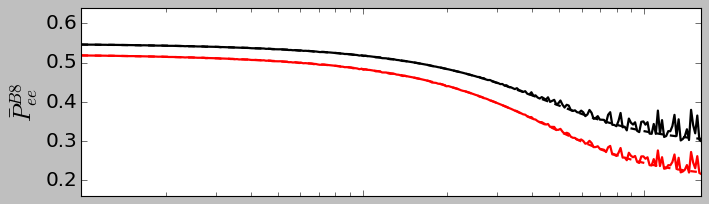

In [ ]:
plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.16,0.64)
ax1.set_xlim(0.1,16)
ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax1.plot(peanuts_msw_B8[:,0],peanuts_msw_B8[:,1],color='k',ls='--',lw=2)
ax1.plot(peanuts_msw_B8M[:,0],peanuts_msw_B8M[:,1],color='k',ls='-',lw=2)

ax1.plot(peanuts_B8[:,0],peanuts_B8[:,1],color='r',ls='--',lw=2)
ax1.plot(peanuts_B8M[:,0],peanuts_B8M[:,1],color='r',ls='-',lw=2)



# Pee, _, ls, _ = ULDM(param, Enu)
# Pee_av = np.mean(Pee/ls**2 , axis=0)
# ax1.plot(Enu,Pee_av,color='k',ls='-',lw=2)

# param['mu2'] = 0.
# Pee, _, ls, _ = ULDM(param, Enu)
# Pee_av = np.mean(Pee/ls**2 , axis=0)
# ax1.plot(Enu,Pee_av,color='k',ls='--',lw=2)

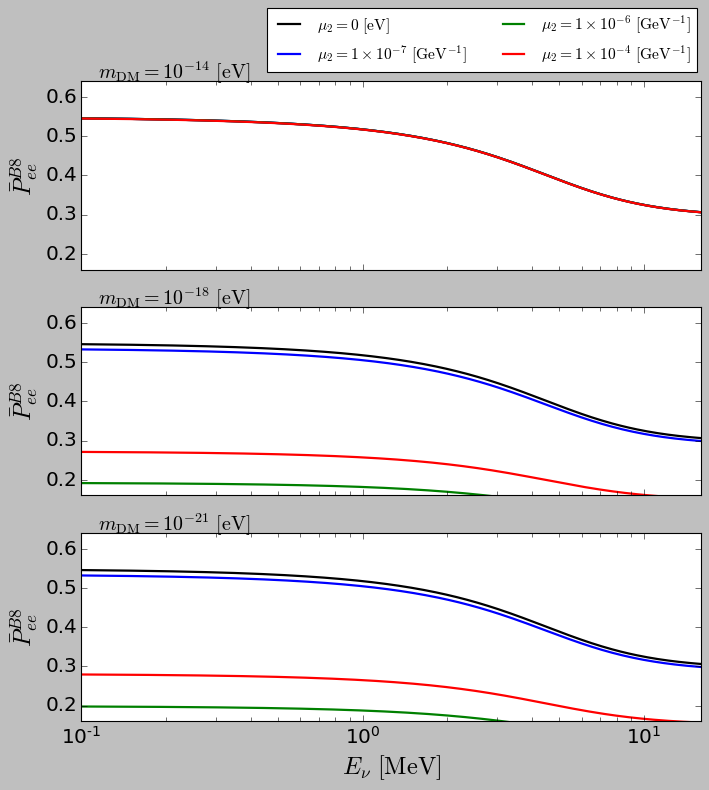

In [82]:
mu2 = [0., 1e-7, 1e-6, 1e-4]

color = ['k','b','g','r', 'c', 'm']

label = [r'$\mu_2  = 0     \ \rm [eV]$'    ,
         r'$\mu_2  = 1 \times 10^{-7} \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 1 \times 10^{-6}  \ \rm [GeV^{-1}]$' ,
         r'$\mu_2  = 1 \times 10^{-4}   \ \rm [GeV^{-1}]$', 
         r'$\mu_2  = 0.7 \times 10^{-6}   \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 0.5 \times 10^{-6}   \ \rm [GeV^{-1}]$' ]

plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.16,0.64)
ax1.set_xlim(0.1,16)
ax1.set_xscale('log')

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e7
for i,m in enumerate(mu2):
    param['mu1'] = m
    param['mu2'] = m
    Pee, _, ls, _ = ULDM(param, Enu)
    Pee_av = np.mean(Pee/ls**2 , axis=0)
    ax1.plot(Enu,Pee_av,color=color[i],lw=2,label=label[i])
ax1.set_title(r'$m_{\rm DM} = 10^{-14} \ \rm [eV]$',y=1.0, pad=2, x=.15, fontsize=18)    

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.16,0.64)
ax2.set_xlim(0.1,16)
ax2.set_xscale('log')

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)


ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee}$',fontsize=22)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e3
for i,m in enumerate(mu2):
    param['mu1'] = m
    param['mu2'] = m
    Pee, _, ls, _ = ULDM(param, Enu)
    Pee_av = np.mean(Pee/ls**2 , axis=0)
    ax2.plot(Enu,Pee_av,color=color[i],lw=2,label=label[i])
ax2.set_title(r'$m_{\rm DM} = 10^{-18} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

ax0 = fig.add_subplot(313)
ax0.set_ylim(0.16,0.64)
ax0.set_xlim(0.1,16)
ax0.set_xscale('log')

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=22)
ax0.set_ylabel(r'$ \bar{P}^{B8}_{ee}$',fontsize=22)

param['mdm'] = 1
for i,m in enumerate(mu2):
    param['mu1'] = m
    param['mu2'] = m
    Pee, _, ls, _ = ULDM(param, Enu)
    Pee_av = np.mean(Pee/ls**2 , axis=0)
    ax0.plot(Enu,Pee_av,color=color[i], lw=2,label=label[i])
ax0.set_title(r'$m_{\rm DM} = 10^{-21} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)
    
plt.legend(loc=(0.3,3.45),ncol=2,fontsize=14)

plt.savefig('Pee_Bar_alpha0epsx1epsy0_mu1_mu2.pdf',bbox_inches='tight')

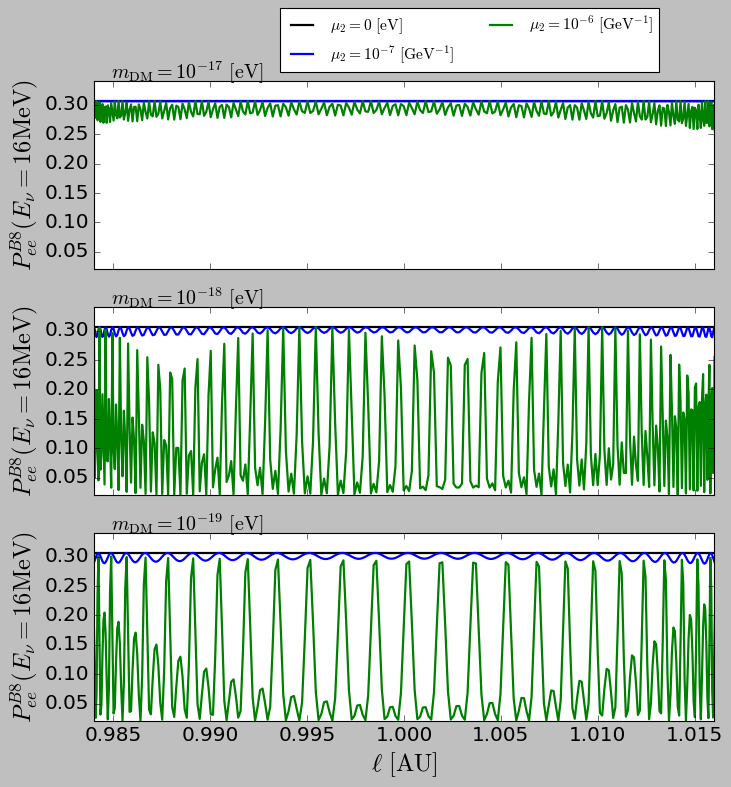

In [5]:
mu2 = [0., 1e-7, 1e-6]

color = ['k','b','g','r']

label = [r'$\mu_2  = 0     \ \rm [eV]$'    ,
         r'$\mu_2  = 10^{-7} \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 10^{-6}  \ \rm [GeV^{-1}]$' ,
         r'$\mu_2  = 10^{-5}   \ \rm [GeV^{-1}]$'  ]

plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.02,0.34)
ax1.set_xlim(0.984,1.016)

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV) $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e4
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax1.plot(ls[:int(ls.shape[0]/2),-1], Pee[:int(ls.shape[0]/2),-1], color=color[i], lw=2, label=label[i])
ax1.set_title(r'$m_{\rm DM} = 10^{-17} \ \rm [eV]$',y=1.0, pad=2, x=.15, fontsize=18)    

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.02,0.34)
ax2.set_xlim(0.984,1.016)

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)

ax2.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e3
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax2.plot(ls[:int(ls.shape[0]/2),-1], Pee[:int(ls.shape[0]/2),-1], color=color[i], lw=2, label=label[i])
ax2.set_title(r'$m_{\rm DM} = 10^{-18} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

ax0 = fig.add_subplot(313)
ax0.set_ylim(0.02,0.34)
ax0.set_xlim(0.984,1.016)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$\ell \ \rm [AU]$',fontsize=22)
ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax0.get_xaxis().get_major_formatter().set_useOffset(False)

param['mdm'] = 1e2
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax0.plot(ls[:int(ls.shape[0]/2),-1], Pee[:int(ls.shape[0]/2),-1], color=color[i], lw=2, label=label[i])

ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

plt.legend(loc=(0.3,3.45),ncol=2,fontsize=14)
plt.savefig('Pee_E16_alpha0epsx1epsy0.pdf',bbox_inches='tight')

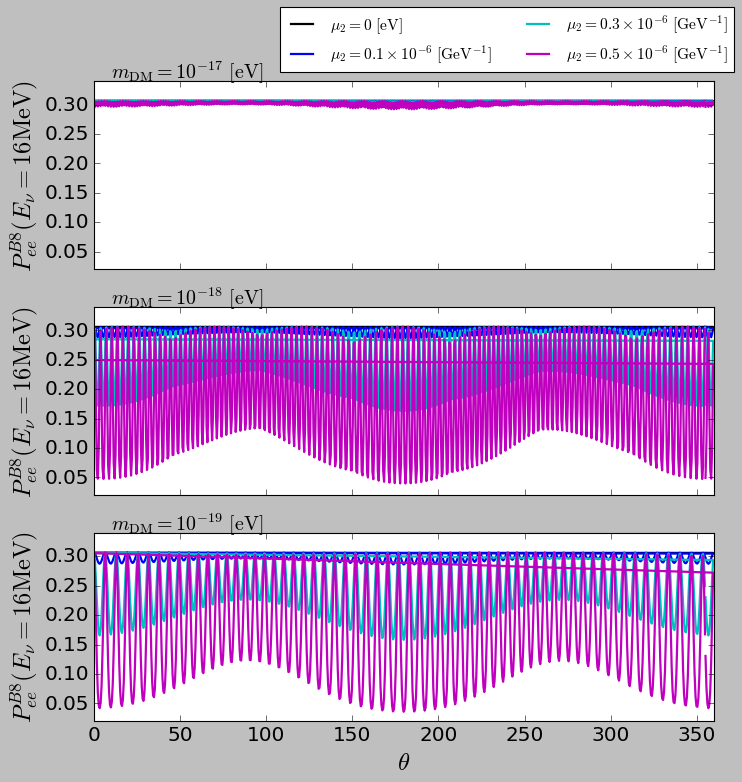

In [7]:
mu2 = [0., 0.1e-6, 0.3e-6, 0.5e-6]

color = ['k','b','c','m']

label = [r'$\mu_2  = 0     \ \rm [eV]$'    ,
         r'$\mu_2  = 0.1 \times 10^{-6} \ \rm [GeV^{-1}]$',
         r'$\mu_2  = 0.3 \times 10^{-6}  \ \rm [GeV^{-1}]$' ,
         r'$\mu_2  = 0.5 \times 10^{-6}   \ \rm [GeV^{-1}]$'  ]

plt.rcParams.update({'font.size': 18})
fig  = plt.figure(figsize=(10,10))

fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(311)
ax1.set_ylim(0.02,0.34)
ax1.set_xlim(0,360)

ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)

ax1.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV) $',fontsize=22)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e4
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax1.plot(angle, Pee[:,-1], color=color[i], lw=2, label=label[i])
ax1.set_title(r'$m_{\rm DM} = 10^{-17} \ \rm [eV]$',y=1.0, pad=2, x=.15, fontsize=18)    

ax2 = fig.add_subplot(312)
ax2.set_ylim(0.02,0.34)
ax2.set_xlim(0,360)

ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)

ax2.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

param['mdm'] = 1e3
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax2.plot(angle, Pee[:,-1], color=color[i], lw=2, label=label[i])
ax2.set_title(r'$m_{\rm DM} = 10^{-18} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

ax0 = fig.add_subplot(313)
ax0.set_ylim(0.02,0.34)
ax0.set_xlim(0,360)

ax0.tick_params(axis='both', which='minor', length=4)
ax0.tick_params(axis='both', which='major', length=5)

ax0.set_xlabel(r'$\theta $',fontsize=22)
ax0.set_ylabel(r'$ P^{B8}_{ee}(E_\nu = 16 \rm MeV)$',fontsize=22)
#ax0.get_xaxis().get_major_formatter().set_useOffset(False)

param['mdm'] = 1e2
for i,m in enumerate(mu2):
    param['mu2'] = m
    Pee, _, ls, angle = ULDM(param, Enu)
    ax0.plot(angle, Pee[:,-1], color=color[i], lw=2, label=label[i])
ax0.set_title(r'$m_{\rm DM} = 10^{-19} \ \rm [eV]$',y=1.0, pad=2, x=.15,fontsize=18)

plt.legend(loc=(0.3,3.45),ncol=2,fontsize=14)
plt.savefig('Pee_E16_alpha0epsx1epsy0_angle.pdf',bbox_inches='tight')